For reference, https://mixtape.scunning.com/

Tech blogs:

https://netflixtechblog.com/a-survey-of-causal-inference-applications-at-netflix-b62d25175e6f 

https://netflixtechblog.com/quasi-experimentation-at-netflix-566b57d2e362

#### 2.13 Ordinary Least Squares

The assumptions underlying OLS are crucial for the validity and efficiency of the estimates. Here are the main assumptions of OLS:

**Linearity:** The relationship between the independent variables and the dependent variable is linear. The model assumes that changes in the independent variables have a constant effect on the dependent variable.

**Independence:** There is not a relationship between the residuals and the `Y` variable; in other words, `Y` is independent of errors.
Observations are independent of each other. 

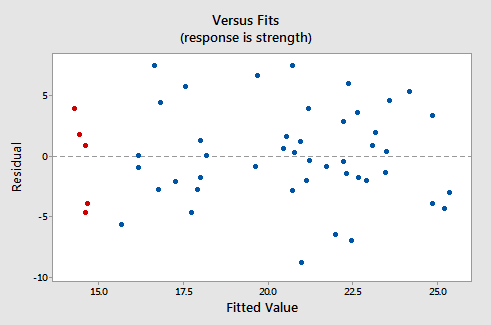

Here are the characteristics of a well-behaved residual vs. fits plot and what they suggest about the appropriateness of the simple linear regression model:

- The residuals "bounce randomly" around the 0 line. This suggests that the assumption that the relationship is linear is reasonable.
- The residuals roughly form a "horizontal band" around the 0 line. This suggests that the variances of the error terms are equal.
- No one residual "stands out" from the basic random pattern of residuals. This suggests that there are no outliers.

**Homoscedasticity (Constant Variance of Residuals):** The variance of the residuals (the differences between the observed and predicted values) should be constant across all levels of the independent variables. This ensures that the spread of residuals is the same throughout the entire range of the predictors.

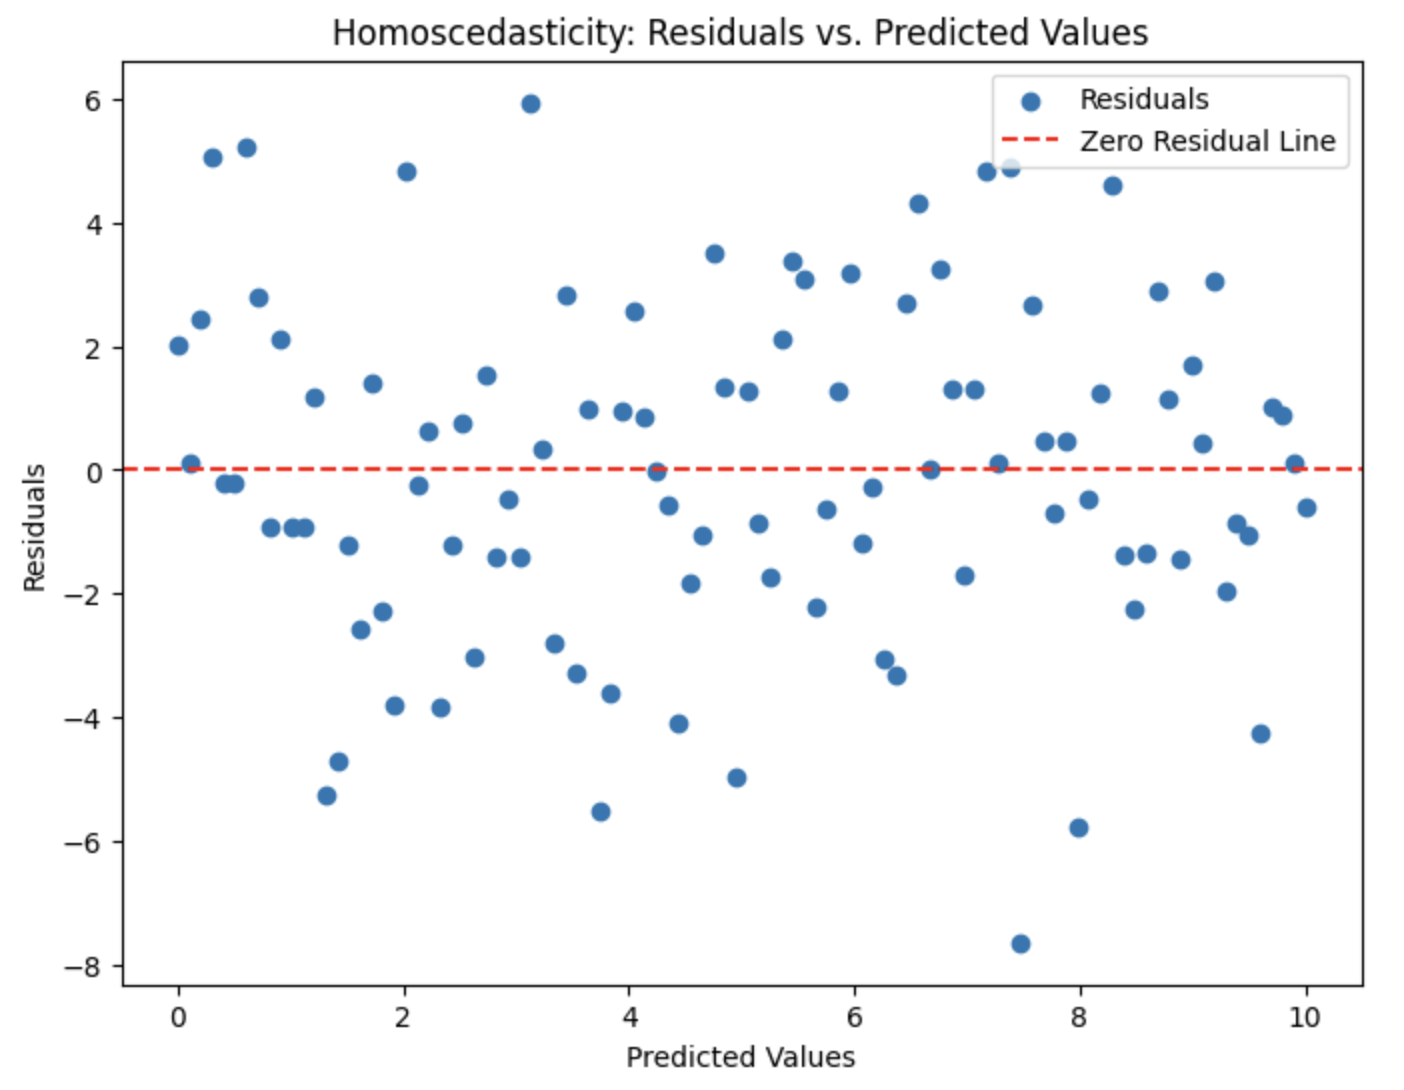

**No Autocorrelation of Residuals:** The residuals should be independent of each other (no correlation between residuals). Autocorrelation occurs when the error terms in a time-series regression are correlated over time.

While a residual plot, or lag-1 plot allows you to visually check for autocorrelation, you can formally test the hypothesis using the Durbin-Watson test. The Durbin-Watson statistic is used to detect the presence of autocorrelation at lag 1 (or higher) in the residuals from a regression. The value of the test statistic lies between 0 and 4, small values indicate successive residuals are positively correlated. If the Durbin-Watson statistic is much less than 2, there is evidence of positive autocorrelation, if much greater than 2 evidence of negative autocorrelation. 

https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf/notebook

**Normality of Residuals:** The residuals (errors) should be normally distributed. This assumption is not crucial for unbiased and consistent parameter estimates, but it is important for hypothesis testing and constructing confidence intervals.

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtable displaystyle="true">
    <mlabeledtr>
      <mtd>
        <mi>Mean</mi>
        <mi>E</mi>
        <mo stretchy="false">(</mo>
        <mi>u</mi>
        <mo stretchy="false">)</mo>
        <mo>=</mo>
        <mn>0</mn>
      </mtd>
    </mlabeledtr>
  </mtable>
</math>

Variance (σ2)= 1

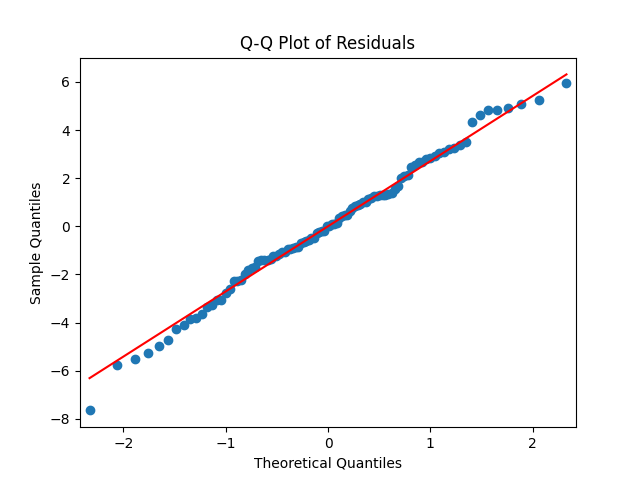

keep in mind that for large sample sizes, the central limit theorem often ensures that the normality assumption is less critical, and the estimates are still valid even if the residuals are not perfectly normal.

**No Perfect Multicollinearity:** There should not be perfect linear relationships among the independent variables. Perfect multicollinearity occurs when one independent variable is a perfect linear function of others, making it impossible to estimate unique coefficients.

**No Endogeneity:** The error term is not correlated with the independent variables. Endogeneity can occur when there are omitted variables, measurement errors, or simultaneous causation issues.

#### Notes: 

**Difference between the Error Term and Residual:**

The error term is a theoretical construct that represents the unobservable true difference between the actual outcomes in the population and the values predicted by the regression model. Mathematically: In a linear regression equation, it is often denoted as `u`. 

While both the residual and the error term are represented with a `u`, it is important to know the differences. The residual is the prediction error based on our fitted `y^` and the actual `y`. The residual is therefore easily calculated with any sample of data. But `u`
without the hat is the error term, and it is by definition unobserved by the researcher. Whereas the residual will appear in the data set once generated from a few steps of regression and manipulation, the error term will never appear in the data set. It is all of the determinants of our outcome not captured by our model. 

Assumptions: The error term is assumed to have certain properties, such as a mean of zero E(et) = 0, and constant variance Var(et) = σ2

**Slope estimate B1**

The OLS slope estimate `B1` can only be meaningfully computed when there is variation in the independent variable. The presence of variability in `x` allows for the identification of its impact on `y` in the context of linear regression analysis. Without variability in `x`, it becomes challenging or impossible to estimate the slope of the relationship.

The slope `B1` represents the change in the dependent variable `Y` for a one-unit change in the independent variable `X1`, while holding all other variables constant. It quantifies the impact of `X1` on `Y`.

In multiple regression with multiple independent variables `Y = B0 + B1.X + B2.X + B2.X + e`, each β coefficient represents the change in 
`Y` associated with a one-unit change in the corresponding independent variable, holding all other variables constant.

In [11]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import matplotlib.pyplot as plt

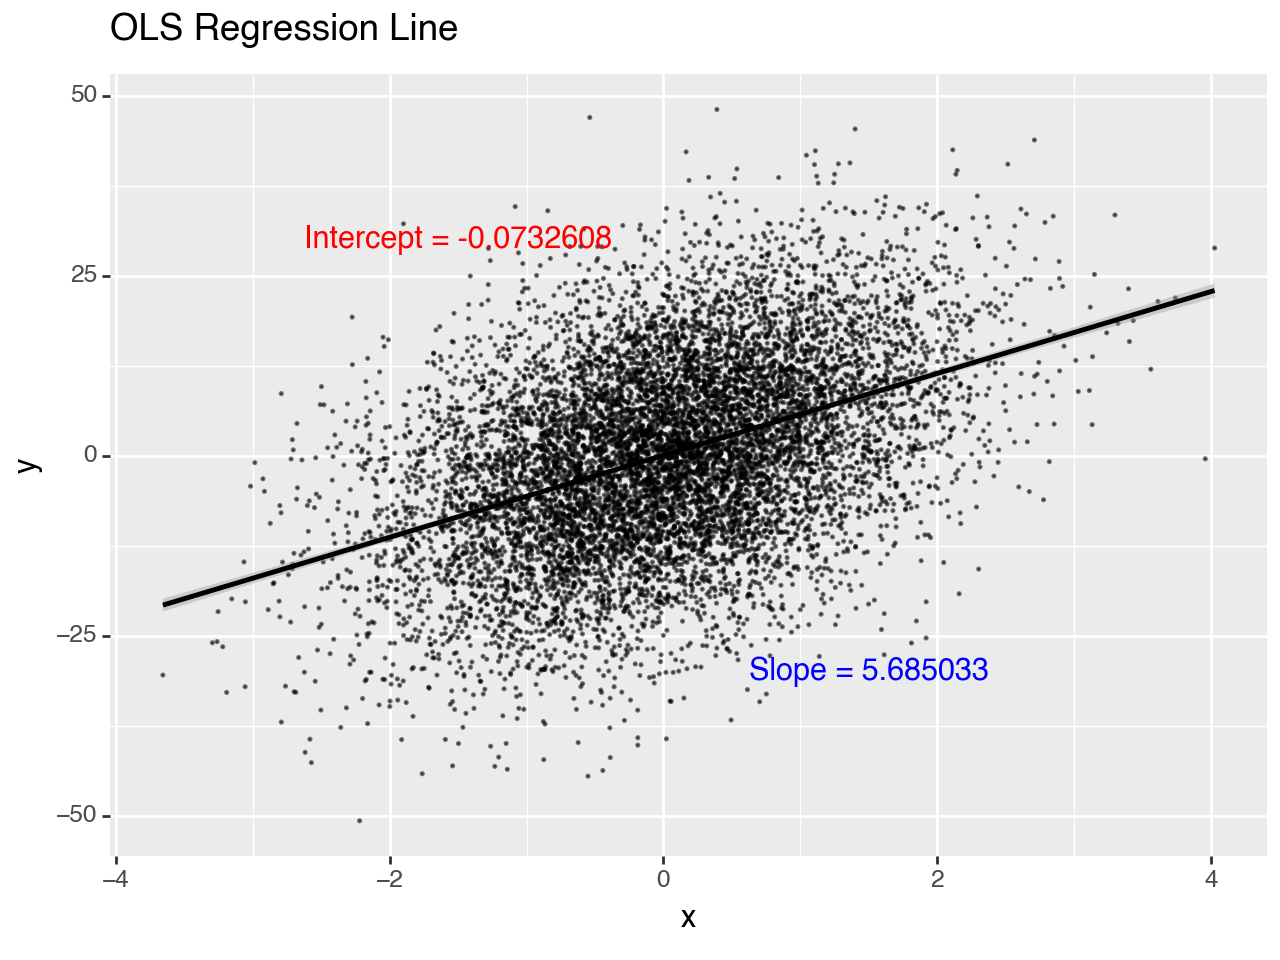

<Figure Size: (640 x 480)>

In [2]:
# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)

np.random.seed(1)

tb = pd.DataFrame({
    'x': np.random.normal(size=10000),
    'u': np.random.normal(size=10000)})
tb['y'] = 5.5*tb['x'].values + 12*tb['u'].values

reg_tb = sm.OLS.from_formula('y ~ x', data=tb).fit()
reg_tb.summary()


tb['yhat1'] = reg_tb.predict(tb)
tb['yhat2'] = 0.1114 + 5.6887*tb['x']
tb['uhat1'] = reg_tb.resid
tb['uhat2'] = tb['y'] - tb['yhat2']

tb.describe()

p.ggplot(tb, p.aes(x='x', y='y')) +\
    p.ggtitle("OLS Regression Line") +\
    p.geom_point(size = 0.05, color = "black", alpha = 0.5) +\
    p.geom_smooth(p.aes(x='x', y='y'), method = "lm", color = "black") +\
    p.annotate("text", x = -1.5, y = 30, color = "red", 
             label = "Intercept = {}".format(-0.0732608)) +\
    p.annotate("text", x = 1.5, y = -30, color = "blue", 
             label = "Slope = {}".format(5.685033))

Notice that the intercept is the predicted value of `y` if and when `x=0`. In this sample, that value is `-0.0742608`. The slope allows us to predict changes in `y` for any reasonable change in `x` according to: 

`Δy^ = B1^ Δx`

And if `Δx = 1`, then `x` increases by one unit, and so `Δy^ = 5.685033` in our numerical example because `B1^ = 5.685033`. 

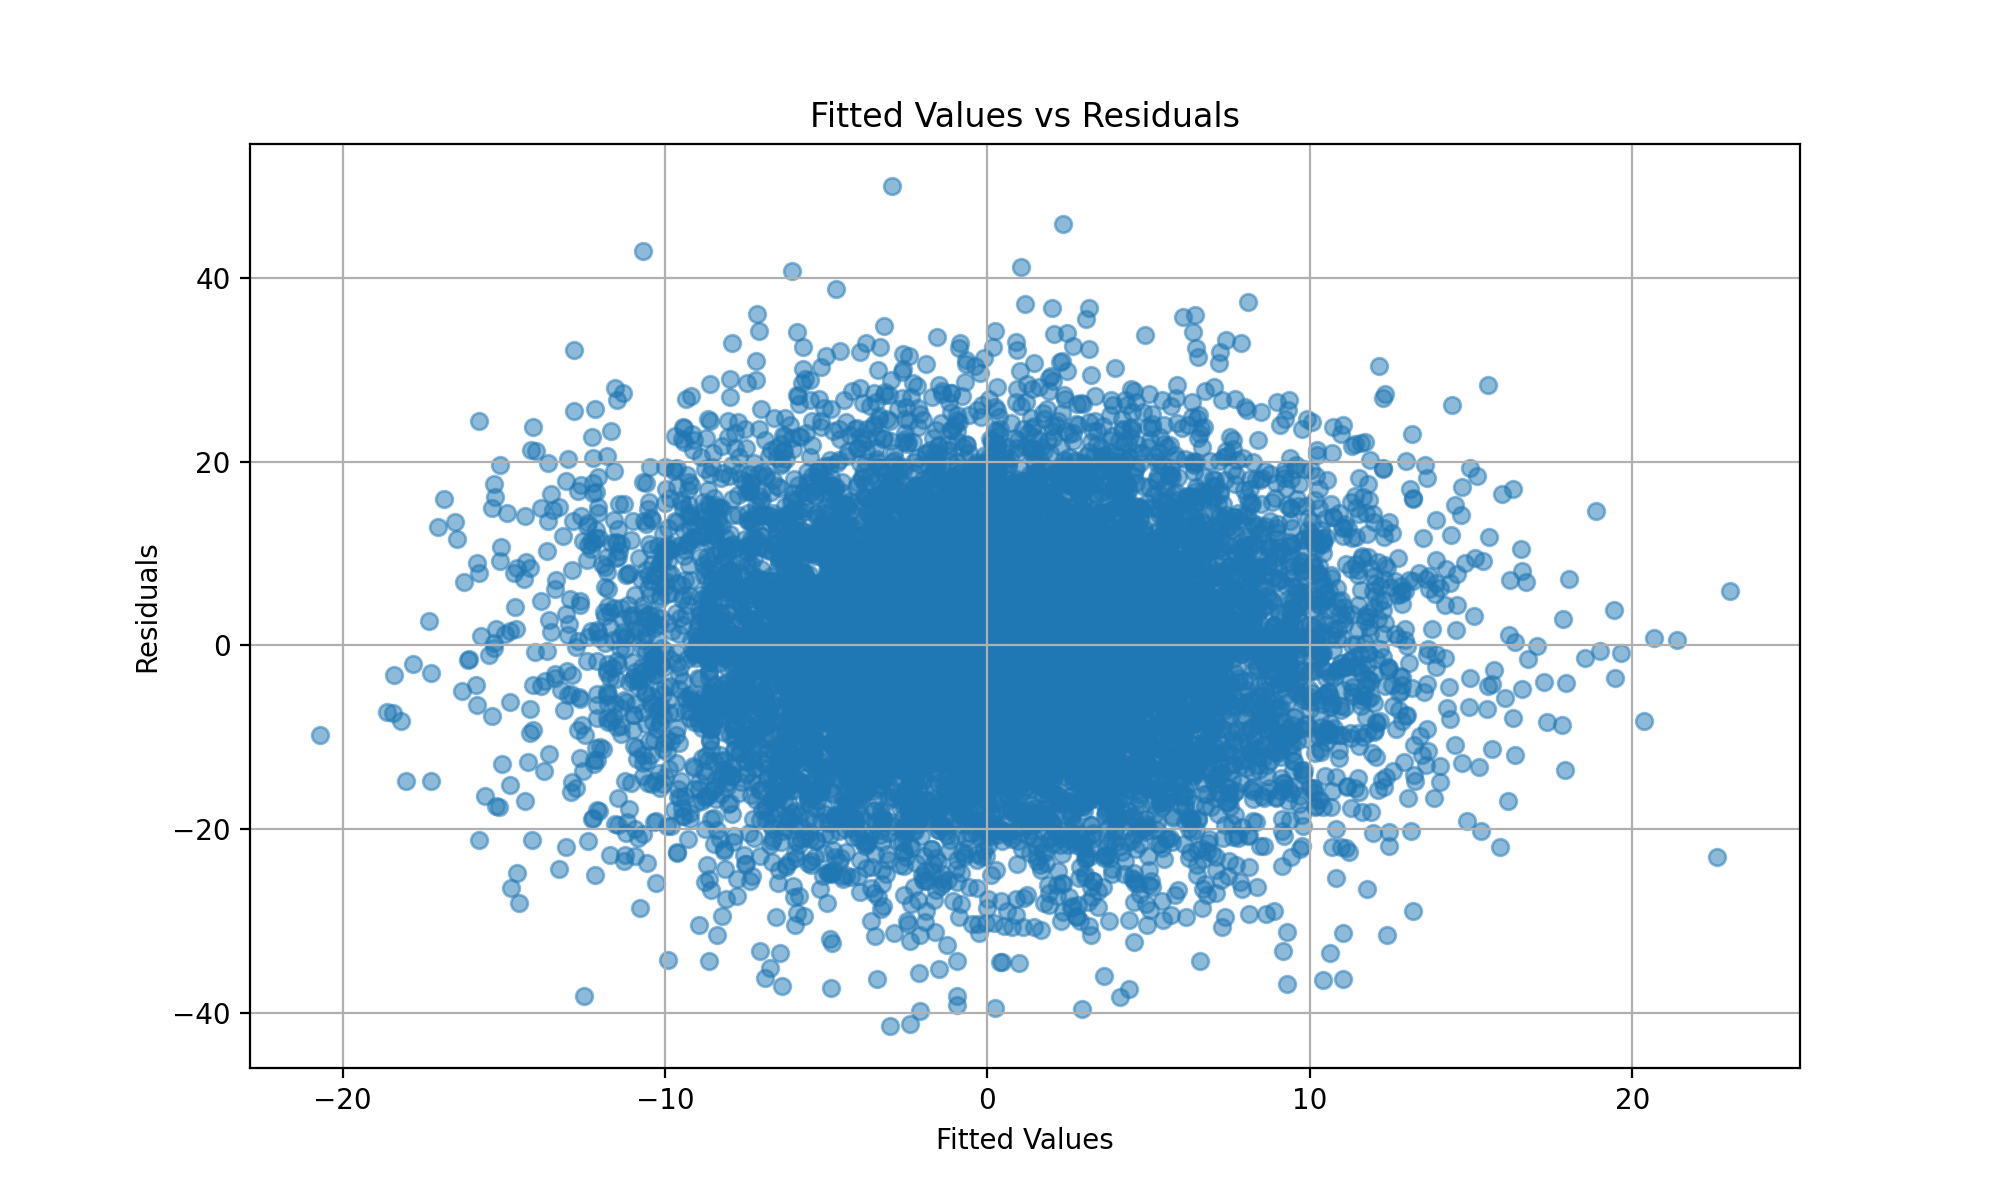

In [5]:
# Add fitted values and residuals to the DataFrame
tb['yhat1'] = reg_tb.predict(tb)
tb['uhat1'] = reg_tb.resid

# Create a plot of fitted values vs residuals
plt.figure(figsize=(10, 6))
plt.scatter(tb['yhat1'], tb['uhat1'], alpha=0.5)
plt.title('Fitted Values vs Residuals')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

Recall that we defined the fitted value as `y^` and the residual `ui^` as `yi-y^`. Notice that the scatter-plot relationship between the residuals and the fitted values created a spherical pattern, suggesting that they are not correlated. This is mechanical—least squares produces residuals which are uncorrelated with fitted values. There’s no magic here, just least squares.

In [6]:
# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)


tb = pd.DataFrame({
    'x': 9*np.random.normal(size=10),
    'u': 36*np.random.normal(size=10)})
tb['y'] = 3*tb['x'].values + 2*tb['u'].values

reg_tb = sm.OLS.from_formula('y ~ x', data=tb).fit()

tb['yhat1'] = reg_tb.predict(tb)
tb['uhat1'] = reg_tb.resid

tb.describe()

,x,u,y,yhat1,uhat1
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,-0.844111,7.893200,13.254067,13.254067,0.000000
std,8.542685,30.996325,76.997388,53.502037,55.372645
min,-17.384075,-39.860946,-131.874117,-90.334179,-111.847362
25%,-4.565266,-20.063648,-32.853301,-10.051177,-30.320668
50%,-1.649420,15.001222,19.110051,8.210495,18.233206
75%,6.298850,35.952517,68.586508,57.989762,35.401184
max,10.207313,39.731946,108.705561,82.468100,59.304699


In [9]:
# Sum of residuals equal to zero
tb['uhat1'].sum()

0.0

Do not fixate on `R-squared` in research projects where the aim is to estimate some causal effect, though. It’s a useful summary measure, but it does not tell us about causality. Remember, you aren’t trying to explain variation in `y` if you are trying to estimate some causal effect. The `R-Squared` tells us how much of the variation in `yi` is explained by the explanatory variables. But if we are interested in the causal effect of a single variable, `R-Squared` is irrelevant.

#### 2.16 Expected value of OLS

There are several assumptions required for OLS Estimator to be unbiased. 

1. The first assumption is called **linear in the parameters**. `y = B0 + B1x + u`, where `B0` and `B1` are unknown population parameters.

2. **Random Sampling.** We have a random sample of size `n` following the population model. and we estimate `B0` and `B1` for each sample.
   
3. **Sample variation in explanatory variable.** The sample outcomes on `xi` are not all the same value. i.e the Sample variance of `x` is not `0`. If the `xi` all have the same value (i.e., are constant), we cannot learn how `x` affects `y`. Recall that OLS is the covariance of `y` and `x`, divided by the variance in `x`, and so if `x` is constant, then we are dividing by zero, and the OLS estimator is undefined.

4. The **zero conditional mean** assumption, also known as the exogeneity assumption, is a key assumption in the context of linear regression models for causal inference. It states that the conditional expectation of the error term is zero given any value of the independent variables. Mathematically, this assumption is expressed as: `E(u | X) = 0`

The exogeneity assumption states that the independent variables (predictors) in the model are uncorrelated with the error term. In other words, there should be no systematic relationship between the explanatory variables and the unobserved factors affecting the dependent variable.

Mathematically, the exogeneity assumption can be expressed as:

`Cov(Xi,ui)=0`

where:

`Xi` represents the vector of independent variables for the i-th observation

`ui` is the error term for the i-th observation.

**Classical Assumption in Regression: All independent variables are uncorrelated with the error term**

Here's the intuition behind the zero conditional mean assumption:

a. **Unbiasedness of Coefficient Estimates:**
   - The assumption is crucial for the unbiasedness of the OLS (Ordinary Least Squares) coefficient estimates. If the conditional mean of the error term is zero, it implies that, on average, the errors do not systematically overestimate or underestimate the true values of the dependent variable.

b. **Endogeneity and Omitted Variable Bias:**
   - The zero conditional mean assumption helps address endogeneity issues. Endogeneity occurs when there are omitted variables or other factors that are correlated with both the independent variables and the error term. If this correlation exists, it could lead to biased coefficient estimates. The zero conditional mean assumption implies that, on average, there are no such omitted variables affecting the dependent variable.

Scenario:

Let's say that natural ability **(intelligence) (Z)** is an unobserved variable that affects both **education (X)** and **income (Y)**. Individuals with higher natural ability might find it easier to stay in school longer and might also earn higher incomes because of their inherent talents.

    (Z) ---> (X) ---> (Y)

Issue:

If we do not account for the influence of natural ability (Z) in our model, we have an endogeneity problem. The error term (u) is correlated with the independent variable (X).

Consequence:

Omitted variable bias can occur. The estimated coefficient for education (X) may capture not only the direct effect of education but also the indirect effect through natural ability. As a result, the estimated effect of education on income may be biased.

c. **Conditional Independence:**
   - The assumption of a zero conditional mean essentially means that the errors are conditionally uncorrelated with the independent variables. **In other words, knowing the values of the independent variables does not provide any information about the expected value of the error term.** This is important for the reliability of hypothesis tests and confidence intervals.

d. **Causal Interpretation:**
   - From a causal perspective, the zero conditional mean assumption suggests that, on average, there are no systematic factors left unaccounted for in the model that are affecting the dependent variable. This is critical for making causal interpretations of the estimated coefficients.

5. **Instrumental Variables (IV):**
   - In some cases, when the zero conditional mean assumption is violated due to endogeneity, instrumental variables (IV) can be used to address the issue. Instrumental variables are variables that are correlated with the endogenous variable but not directly with the dependent variable, and they help identify the causal effect by satisfying the zero conditional mean assumption.

It's important to note that the zero conditional mean assumption is an assumption that cannot be directly tested from the data. Researchers need to carefully consider the plausibility of this assumption based on their understanding of the underlying causal relationships and the potential presence of omitted variables or endogeneity. Sensitivity analyses and alternative methods may be considered when the zero conditional mean assumption is likely to be violated.

Let’s create a Monte Carlo simulation. We have the following population model:

y = 3 + 2x + u

where `x = Norm(0,9)`, and `u = Norm(0,36)`. Also, `x` and `u` are independent. The following Monte Carlo simulation will estimate OLS on a sample of data 1,000 times. The true parameter `B` equals `2`. But what will the average `B^` equal when we use repeated sampling?

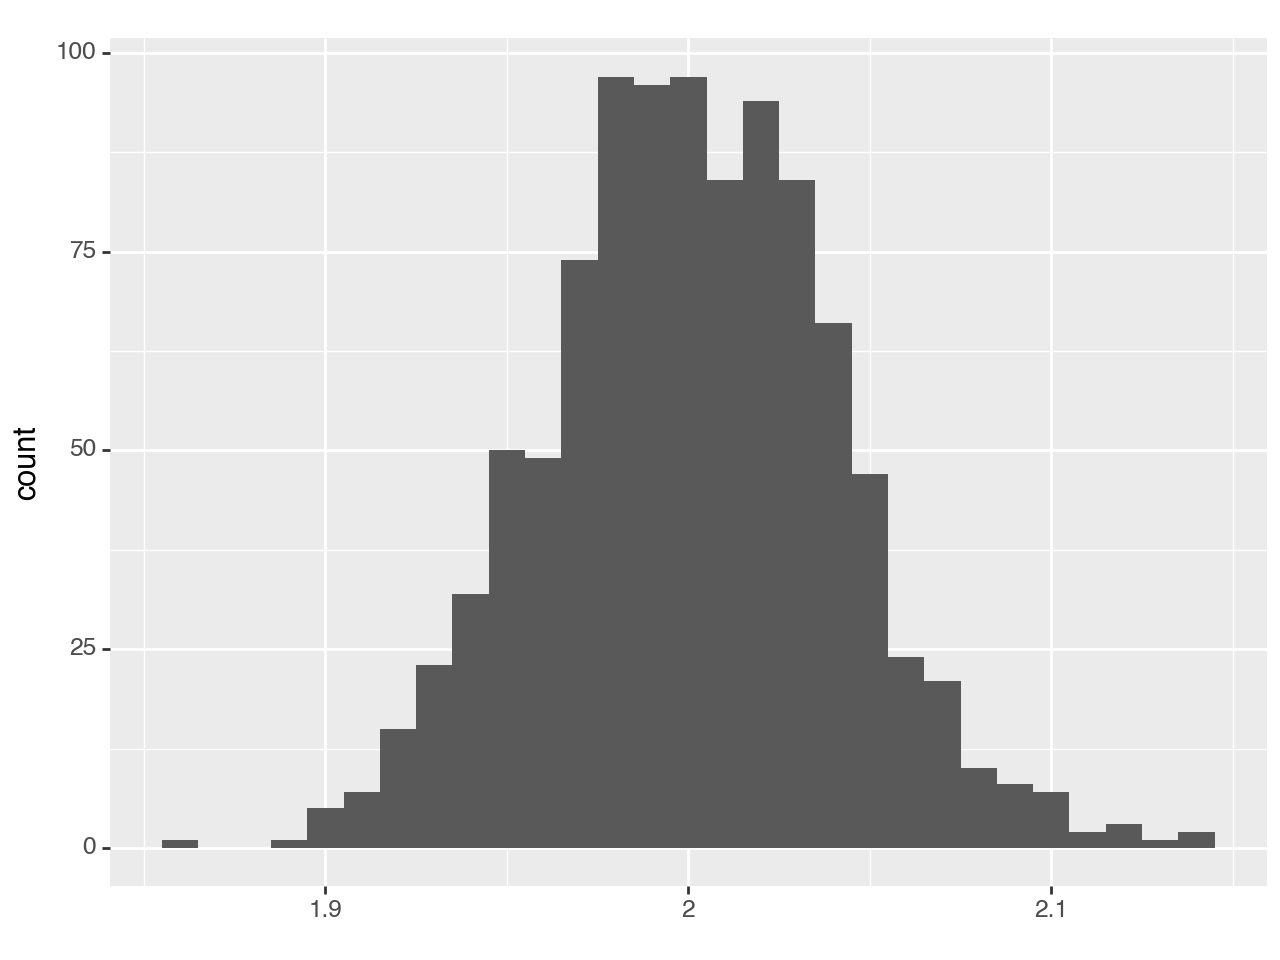

<Figure Size: (640 x 480)>

In [50]:
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)

coefs = np.zeros(1000)
for i in range(1000):
    tb = pd.DataFrame({
                       'x': np.random.normal(0, 9, size=10000),
                       'u': np.random.normal(0, 36, size=10000)
                     })
    
    tb['y'] = 3 + 2*tb['x'].values + tb['u'].values

    reg_tb = sm.OLS.from_formula('y ~ x', data=tb).fit()

    coefs[i] = reg_tb.params['x']

p.ggplot() +\
  p.geom_histogram(p.aes(x=coefs), binwidth = 0.01)

In [51]:
reg_tb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     2390.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:12:53   Log-Likelihood:                -50165.
No. Observations:               10000   AIC:                         1.003e+05
Df Residuals:                    9998   BIC:                         1.003e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0282      0.365      8.292      0.000       2.312       3.744
x              1.9710      0.040     48.886      0.000       1.892       2.050
==============================================================================
Omnibus:                        0.479   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.787   Jarque-Bera (JB):                0.449
Skew:                           0.012   Prob(JB):                        0.799
Kurtosis:                       3.022   Cond. No.                         9.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that the estimate is the mean value of the coefficient from repeated sampling, and the standard error is the standard deviation from that repeated estimation.

In [52]:
coefs.mean()

2.0006763056430428

The problem is we don't know which kind of sample we have. We can never know whether we are close to the population value. We hope that our sample is “typical” and produces a slope estimate close to `B1^` but we can't know. Unbiasedness is a property of the procedure of the rule. It is not a property of the estimate itself. 

For example, say we estimated an that **8.2%** return on schooling. It is tempting to say that **8.2%** is an unbiased estimate of the return to schooling, but that’s technically incorrect. The rule used to get `B1^ = 0.082` is unbiased (if we believe that is unrelated to schooling), not the actual estimate itself.

### DAGs

https://mixtape.scunning.com/03-directed_acyclical_graphs

Directed Acyclic Graphs (DAGs) in causal modeling, emphasizing that DAG notation represents causality running in one direction, typically forward in time. Here are some key points:

**Causality Direction:** In DAG notation, causal relationships are represented as directed edges between nodes, indicating the direction of causality. The absence of cycles in a DAG implies that causation flows forward in time, and feedback loops or recursive relationships are not allowed.

**Handling Reverse Causality:** To represent reverse causality in a DAG, one would need to create separate nodes for each version of a variable at different time points. This is a workaround to simulate reverse causality, as DAGs inherently operate in a forward causal direction.

**Simultaneity Challenge:** Simultaneity, such as in supply and demand models where variables influence each other simultaneously, poses challenges in DAGs. DAGs are not naturally suited to handle situations where variables affect each other at the same point in time.

**Counterfactuals:** DAGs explain causality in terms of counterfactuals. That is, a causal effect is defined as a comparison between two states of the world—one state that actually happened when some intervention took on some value and another state that didn’t happen (the “counterfactual”) under some other intervention.

<ins>A simple DAG:<ins>

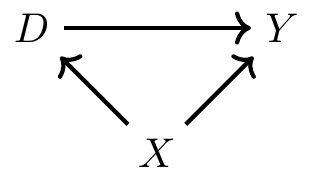

In this DAG, we have three random variables: `X, D` and `Y`. There is a direct path from `D` to `Y`, which represents a causal effect. That path is represented by `D -> Y`. But there is also a second path from `D` to `Y` called the *_backdoor path_*. The backdoor path is `D <- X -> Y`. While the direct path is a causal effect, the backdoor path is not causal. Rather, it is a process that creates spurious correlations between `D` and `Y` that are driven solely by fluctuations in the `X` random variable.

The idea of the backdoor path is one of the most important things we can learn from the DAG. It is similar to the notion of omitted variable bias in that it represents a variable that determines the outcome and the treatment variable. Just as not controlling for a variable like that in a regression creates omitted variable bias, leaving a backdoor open creates bias. The backdoor path is `D <- X -> Y`. We therefore call `X` a confounder because it jointly determines `D` and `Y`, and so confounds our ability to discern the effect of `D` on `Y` in naı̈ve comparisons.

In the previous example, `X` was observed. We know it was observed because the direct edges from `X` to `D` and `Y` were solid lines. But sometimes there exists a confounder that is unobserved, and when there is, we represent its direct edges with dashed lines. Consider the following DAG:

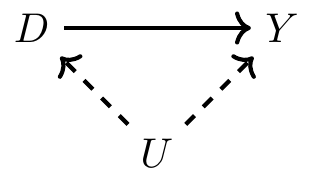

Same as before, `U` is a *_noncollider_* along the backdoor path from `D` to `Y`, but unlike before, `U` is unobserved to the researcher. It exists, but it may simply be missing from the data set. In this situation, there are two pathways from `D` to `Y`. There’s the direct pathway, `D` to `Y`, which is the causal effect, and there’s the backdoor pathway, `D <- U -> Y`. And since `U` is unobserved, that backdoor pathway is open.

**What is a collider?**

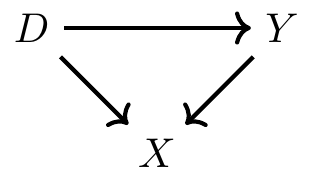

All paths from `D` to `Y`: 

1. `D` -> `Y` (causal effect of `D` on `Y`)
2. `D` -> `X` <- `Y` (backdoor path 1)

This time the `X` has two arrows pointing to it, not away from it. When two variables cause a third variable along some path, we call that third variable a “collider.” Put differently, `X` is a collider along this backdoor path because `D` and the causal effects of `Y` collide at `X`. 

Colliders are special in part because when they appear along a backdoor path, that backdoor path is closed simply because of their presence. 


**Backdoor criterion**

We care about open backdoor paths because they create systematic, noncausal correlations between the causal variable of interest and the outcome you are trying to study. In regression terms, open backdoor paths introduce omitted variable bias, and for all you know, the bias is so bad that it flips the sign entirely. Our goal, then, is to close these backdoor paths. And if we can close all of the otherwise open backdoor paths, then we can isolate the causal effect of `D` on `Y` using one of the research designs and identification strategies. 

There are two ways to close a backdoor path. 

- First, if you have a confounder that has created an open backdoor path, then you can close that path by conditioning on the confounder. Conditioning requires holding the variable fixed using something like subclassification, matching, regression, or another method. It is equivalent to “controlling for” the variable in a regression.
  
- The second way to close a backdoor path is the appearance of a collider along that backdoor path. Since colliders always close backdoor paths, and conditioning on a collider always opens a backdoor path, choosing to ignore the colliders is part of your overall strategy to estimate the causal effect itself. By not conditioning on a collider, you will have closed that backdoor path and that takes you closer to your larger ambition to isolate some causal effect.

You have satisfied the backdoor criterion, then you have in effect isolated some causal effect.

An example, let's say we regress `Y` onto `D`, our discrimination variable and incrementally add control variables. 

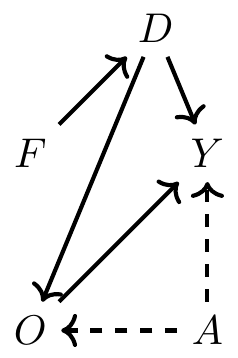


In [48]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from stargazer.stargazer import Stargazer
from itertools import combinations 
import plotnine as p

# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)



tb = pd.DataFrame({
                   'female': np.random.binomial(1, .5, size=10000),
                   'ability': np.random.normal(size=10000)
                 })

tb['discrimination'] = tb.female.copy()

tb['occupation'] = 1 + 2*tb['ability'] + 0*tb['female'] - 2*tb['discrimination'] + np.random.normal(size=10000)
tb['wage'] = 1 - 1*tb['discrimination'] + 1*tb['occupation'] + 2*tb['ability'] + np.random.normal(size=10000) 



"""
This simulation hard-codes the data-generating process represented by the previous DAG. Notice that ability is a random draw from the standard normal distribution. 

Therefore it is independent of female preferences. And then we have our last two generated variables: the heterogeneous occupations and their corresponding wages. 

Occupations are increasing in unobserved ability but decreasing in discrimination. Wages are decreasing in discrimination but increasing in higher-quality jobs and higher ability.

Thus, we know that discrimination exists in this simulation because we are hard-coding it that way with the negative coefficients both the occupation and wage processes.
"""


lm_1 = sm.OLS.from_formula('wage ~ female', data=tb).fit()
lm_2 = sm.OLS.from_formula('wage ~ female + occupation', data=tb).fit()
lm_3 = sm.OLS.from_formula('wage ~ female + occupation + ability', data=tb).fit()


st = Stargazer((lm_1,lm_2,lm_3))
st.custom_columns(["Biased Unconditional", "Biased", "Unbiased Conditional"], [1, 1, 1])
st

The regression coefficients from the three regressions at the end of the code are presented in Table. 

First note that when we simply regress wages onto gender, we get a large negative effect, which is the combination of the direct effect of discrimination on earnings and the indirect effect via occupation. But if we run the regression that Google and others recommend wherein we control for occupation, the sign on gender changes. It becomes positive! We know this is wrong because we hard-coded the effect of gender to be -1! 

The problem is that occupation is a collider. It is caused by ability and discrimination. If we control for occupation, we open up a backdoor path between discrimination and earnings that is spurious and so strong that it perverts the entire relationship. So only when we control for occupation and ability can we isolate the direct causal effect of gender on wages.

#### In conclusion, 

DAGs are powerful tools. They are helpful at both clarifying the relationships between variables and guiding you in a research design that has a shot at identifying a causal effect. And since DAGs are themselves based on counterfactual forms of reasoning, they fit well with the potential outcomes model that I will discuss next.

### Potential Outcomes model

The Potential Outcomes Framework, also known as the Rubin Causal Model, is a conceptual and mathematical framework for understanding causality and estimating causal effects in observational studies and experiments. It was developed by Donald Rubin and has become a foundational approach in the field of causal inference.

The statistician G. Udny Yule made early use of regression analysis in the social sciences. Yule (1899) was interested in the causes of poverty in England. Poor people depended on either poorhouses or the local authorities for financial support, and Yule wanted to know if public assistance increased the number of paupers, which is a causal question. Yule used least squares regression to estimate the partial correlation between public assistance and poverty. His data was drawn from the English censuses of 1871 and 1881.

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext>Pauper</mtext>
  <mo>=</mo>
  <mi>&#x3B1;</mi>
  <mo>+</mo>
  <mi>&#x3B4;</mi>
  <mtext>Outrelief</mtext>
  <mo>+</mo>
  <msub>
    <mi>&#x3B2;</mi>
    <mn>1</mn>
  </msub>
  <mtext>Old</mtext>
  <mo>+</mo>
  <msub>
    <mi>&#x3B2;</mi>
    <mn>2</mn>
  </msub>
  <mtext>Pop</mtext>
  <mo>+</mo>
  <mi>u</mi>
</math>

In [28]:
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)

yule = read_data('yule.dta')

res = sm.OLS.from_formula('paup ~ outrelief + old + pop', yule).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   paup   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     21.49
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           2.00e-07
Time:                        14:31:41   Log-Likelihood:                -115.47
No. Observations:                  32   AIC:                             238.9
Df Residuals:                      28   BIC:                             244.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.1877     27.144      2.328      0.027       7.586     118.789
outrelief      0.7521      0.135      5.572      0.000       0.476       1.029
old            0.0556      0.223      0.249      0.805      -0.402       0.513
pop           -0.3107      0.067     -4.648      0.000      -0.448      -0.174
==============================================================================
Omnibus:                        7.594   Durbin-Watson:                   2.344
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                5.979
Skew:                           0.961   Prob(JB):                       0.0503
Kurtosis:                       3.888   Cond. No.                     2.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In words, a 10-percentage-point change in the out-relief growth rate is associated with a 7.5-percentage-point increase in the pauperism growth rate, or an elasticity of 0.75. Yule used his regression to crank out the correlation between out-relief and pauperism, from which he concluded that public assistance increased pauper growth rates.


But what might be wrong with this reasoning? How convinced are you that all backdoor paths between pauperism and out-relief are blocked once you control for two covariates in a cross-sectional database for all of England? Could there be unobserved determinants of both poverty and public assistance? After all, he does not control for any economic factors, which surely affect both poverty and the amount of resources allocated to out-relief. Likewise, he may have the causality backwards—perhaps increased poverty causes communities to increase relief, and not merely the other way around. The earliest adopters of some new methodology or technique are often the ones who get the most criticism, despite being pioneers of the methods themselves. It’s trivially easy to beat up on a researcher from one hundred years ago, working at a time when the alternative to regression was ideological make-believe. Plus he isn’t here to reply. I merely want to note that the naı̈ve use of regression to estimate correlations as a way of making causal claims that inform important policy questions has been the norm for a very long time, and it likely isn’t going away any time soon.

#### Potential Outcomes Causal Model 

The potential outcomes notation expresses causality in terms of counterfactuals, and since counterfactuals do not exist, confidence about causal effects must to some degree be unanswerable.

Let’s introduce some notation and more specific concepts. For simplicity, we will assume a binary variable that takes on a value of 1 if a particular unit `i` receives the treatment and a 0 if it does not. Each unit will have two potential outcomes, but only one observed outcome. Potential outcomes are defined as **Y<sup>1</sup>i** if unit received the treatment and as **Y<sup>0</sup>i** if the unit did not. Notice that both potential outcomes have the same `i` subscript—this indicates two separate states of the world for the exact same person in our example at the exact same moment in time. We’ll call the state of the world where no treatment occurred the control state. Each unit `i` has exactly two potential outcomes: a potential outcome under a state of the world where the treatment occurred **(Y<sup>1</sup>)**
and a potential outcome where the treatment did not occur **(Y<sup>0</sup>)**.

A unit’s observable outcome is a function of its potential outcomes determined according to the switching equation:

`y <- y1*Di+y0*(1-Di)`


where D<sub>i</sub> equals 1 if the unit received the treatment and 0 if it did not. Notice the logic of the equation. When D<sub>i</sub> = 1, then Y<sub>i</sub> = Y<sub>i</sub> <sup>1</sup> because the second term zeroes out. And when D<sub>i</sub> = 0, the first term zeroes out and therefore Y<sub>i</sub> = Y<sub>i</sub> <sup>0</sup>. Using this notation, we define the unit-specific treatment effect, or causal effect, as the difference between the two states of the world:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>&#x3B4;</mi>
    <mi>i</mi>
  </msub>
  <mo>=</mo>
  <msubsup>
    <mi>Y</mi>
    <mi>i</mi>
    <mn>1</mn>
  </msubsup>
  <mo>&#x2212;</mo>
  <msubsup>
    <mi>Y</mi>
    <mi>i</mi>
    <mn>0</mn>
  </msubsup>
</math>

Immediately we are confronted with a problem. If a treatment effect requires knowing two states of the world, Y<sub>i</sub> <sup>1</sup> and Y<sub>i</sub> <sup>0</sup>, but by the switching equation we observe only one, then we cannot calculate the treatment effect. Herein lies the fundamental problem of causal inference—certainty around causal effects requires access to data that is and always will be missing.


#### Average Treatment effects

There are three different parameters that are often of interest to researchers. They are all population means. 

1. The first is called the **average treatment effect (ATE)**:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtable displaystyle="true" columnalign="right left" columnspacing="0em" rowspacing="3pt">
    <mtr>
      <mtd>
        <mi>A</mi>
        <mi>T</mi>
        <mi>E</mi>
      </mtd>
      <br>
      <mtd>
        <mi></mi>
        <mo>=</mo>
        <mi>E</mi>
        <mo stretchy="false">[</mo>
        <msub>
          <mi>&#x3B4;</mi>
          <mi>i</mi>
        </msub>
        <mo stretchy="false">]</mo>
      </mtd>
    </mtr>
    <br>
    <mtr>
      <mtd></mtd>
      <mtd>
        <mi></mi>
        <mo>=</mo>
        <mi>E</mi>
        <mo stretchy="false">[</mo>
        <msubsup>
          <mi>Y</mi>
          <mi>i</mi>
          <mn>1</mn>
        </msubsup>
        <mo>&#x2212;</mo>
        <msubsup>
          <mi>Y</mi>
          <mi>i</mi>
          <mn>0</mn>
        </msubsup>
        <mo stretchy="false">]</mo>
      </mtd>
    </mtr>
    <br>
    <mtr>
      <mtd></mtd>
      <mtd>
        <mi></mi>
        <mo>=</mo>
        <mi>E</mi>
        <mo stretchy="false">[</mo>
        <msubsup>
          <mi>Y</mi>
          <mi>i</mi>
          <mn>1</mn>
        </msubsup>
        <mo stretchy="false">]</mo>
        <mo>&#x2212;</mo>
        <mi>E</mi>
        <mo stretchy="false">[</mo>
        <msubsup>
          <mi>Y</mi>
          <mi>i</mi>
          <mn>0</mn>
        </msubsup>
        <mo stretchy="false">]</mo>
      </mtd>
    </mtr>
  </mtable>
</math>

Notice, as with our definition of individual-level treatment effects, that the average treatment effect requires both potential outcomes for each `i` unit. Since we only know one of these by the switching equation, the average treatment effect, or the **ATE**, is inherently unknowable. Thus, the **ATE**, like the individual treatment effect, is not a quantity that can be calculated. But it can be estimated.


2. The second parameter of interest is the **average treatment effect for the treatment group (ATT)**.

That’s a mouthful, but let me explain. There exist two groups of people in this discussion we’ve been having: a treatment group and a control group. The average treatment effect for the treatment group, or **ATT** for short, is simply that population mean treatment effect for the group of units that had been assigned the treatment in the first place according to the switching equation. In observational data involving human beings, it almost always will be different from the ATE, and that’s because individuals will be endogenously sorting into some treatment based on the gains they expect from it. Like the ATE, the ATT is unknowable, because like the ATE, it also requires two observations per treatment unit `i`. Formally we write the ATT as:


<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtable displaystyle="true" columnalign="right left" columnspacing="0em" rowspacing="3pt"> 
    <mtr>
      <mtd>
        <mi>A</mi>
        <mi>T</mi>
        <mi>T</mi>
      </mtd>
      <br>
      <mtd>
        <mi></mi>
        <mo>=</mo>
        <mi>E</mi>
        <mrow data-mjx-texclass="ORD">
          <mo minsize="1.2em" maxsize="1.2em">[</mo>
        </mrow>
        <msub>
          <mi>&#x3B4;</mi>
          <mi>i</mi>
        </msub>
        <mo>&#x2223;</mo>
        <msub>
          <mi>D</mi>
          <mi>i</mi>
        </msub>
        <mo>=</mo>
        <mn>1</mn>
        <mrow data-mjx-texclass="ORD">
          <mo minsize="1.2em" maxsize="1.2em">]</mo>
        </mrow>
      </mtd>
    </mtr>
    <br>
    <mtr>
      <mtd></mtd>
      <mtd>
        <mi></mi>
        <mo>=</mo>
        <mi>E</mi>
        <mrow data-mjx-texclass="ORD">
          <mo minsize="1.2em" maxsize="1.2em">[</mo>
        </mrow>
        <msubsup>
          <mi>Y</mi>
          <mi>i</mi>
          <mn>1</mn>
        </msubsup>
        <mo>&#x2212;</mo>
        <msubsup>
          <mi>Y</mi>
          <mi>i</mi>
          <mn>0</mn>
        </msubsup>
        <mo>&#x2223;</mo>
        <msub>
          <mi>D</mi>
          <mi>i</mi>
        </msub>
        <mo>=</mo>
        <mn>1</mn>
        <mrow data-mjx-texclass="ORD">
          <mo minsize="1.2em" maxsize="1.2em">]</mo>
        </mrow>
      </mtd>
    </mtr>
    <br>
    <mtr>
      <mtd></mtd>
      <mtd>
        <mi></mi>
        <mo>=</mo>
        <mi>E</mi>
        <mrow data-mjx-texclass="ORD">
          <mo minsize="1.2em" maxsize="1.2em">[</mo>
        </mrow>
        <msubsup>
          <mi>Y</mi>
          <mi>i</mi>
          <mn>1</mn>
        </msubsup>
        <mo>&#x2223;</mo>
        <msub>
          <mi>D</mi>
          <mi>i</mi>
        </msub>
        <mo>=</mo>
        <mn>1</mn>
        <mrow data-mjx-texclass="ORD">
          <mo minsize="1.2em" maxsize="1.2em">]</mo>
        </mrow>
        <mo>&#x2212;</mo>
        <mi>E</mi>
        <mrow data-mjx-texclass="ORD">
          <mo minsize="1.2em" maxsize="1.2em">[</mo>
        </mrow>
        <msubsup>
          <mi>Y</mi>
          <mi>i</mi>
          <mn>0</mn>
        </msubsup>
        <mo>&#x2223;</mo>
        <msub>
          <mi>D</mi>
          <mi>i</mi>
        </msub>
        <mo>=</mo>
        <mn>1</mn>
        <mrow data-mjx-texclass="ORD">
          <mo minsize="1.2em" maxsize="1.2em">]</mo>
        </mrow>
      </mtd>
    </mtr>
  </mtable>
</math>



3. The final parameter of interest is called the **average treatment effect for the control group (ATU)**, or untreated group, which stands for average treatment effect for the untreated. And like ATT, the ATU is simply the population mean treatment effect for those units who sorted into the control group. Given heterogeneous treatment effects, it’s probably the case that the `ATT != ATU`
, especially in an observational setting. The formula for the ATU is as follows:


<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtable displaystyle="true" columnalign="right left" columnspacing="0em" rowspacing="3pt">
    <mtr>
      <mtd>
        <mi>A</mi>
        <mi>T</mi>
        <mi>U</mi>
      </mtd>
      <br>
      <mtd>
        <mi></mi>
        <mo>=</mo>
        <mi>E</mi>
        <mrow data-mjx-texclass="ORD">
          <mo minsize="1.2em" maxsize="1.2em">[</mo>
        </mrow>
        <msub>
          <mi>&#x3B4;</mi>
          <mi>i</mi>
        </msub>
        <mo>&#x2223;</mo>
        <msub>
          <mi>D</mi>
          <mi>i</mi>
        </msub>
        <mo>=</mo>
        <mn>0</mn>
        <mrow data-mjx-texclass="ORD">
          <mo minsize="1.2em" maxsize="1.2em">]</mo>
        </mrow>
      </mtd>
    </mtr>
    <br>
    <mtr>
      <mtd></mtd>
      <mtd>
        <mi></mi>
        <mo>=</mo>
        <mi>E</mi>
        <mrow data-mjx-texclass="ORD">
          <mo minsize="1.2em" maxsize="1.2em">[</mo>
        </mrow>
        <msubsup>
          <mi>Y</mi>
          <mi>i</mi>
          <mn>1</mn>
        </msubsup>
        <mo>&#x2212;</mo>
        <msubsup>
          <mi>Y</mi>
          <mi>i</mi>
          <mn>0</mn>
        </msubsup>
        <mo>&#x2223;</mo>
        <msub>
          <mi>D</mi>
          <mi>i</mi>
        </msub>
        <mo>=</mo>
        <mn>0</mn>
        <mrow data-mjx-texclass="ORD">
          <mo minsize="1.2em" maxsize="1.2em">]</mo>
        </mrow>
      </mtd>
    </mtr>
    <br>
    <mtr>
      <mtd></mtd>
      <mtd>
        <mi></mi>
        <mo>=</mo>
        <mi>E</mi>
        <mrow data-mjx-texclass="ORD">
          <mo minsize="1.2em" maxsize="1.2em">[</mo>
        </mrow>
        <msubsup>
          <mi>Y</mi>
          <mi>i</mi>
          <mn>1</mn>
        </msubsup>
        <mo>&#x2223;</mo>
        <msub>
          <mi>D</mi>
          <mi>i</mi>
        </msub>
        <mo>=</mo>
        <mn>0</mn>
        <mrow data-mjx-texclass="ORD">
          <mo minsize="1.2em" maxsize="1.2em">]</mo>
        </mrow>
        <mo>&#x2212;</mo>
        <mi>E</mi>
        <mrow data-mjx-texclass="ORD">
          <mo minsize="1.2em" maxsize="1.2em">[</mo>
        </mrow>
        <msubsup>
          <mi>Y</mi>
          <mi>i</mi>
          <mn>0</mn>
        </msubsup>
        <mo>&#x2223;</mo>
        <msub>
          <mi>D</mi>
          <mi>i</mi>
        </msub>
        <mo>=</mo>
        <mn>0</mn>
        <mrow data-mjx-texclass="ORD">
          <mo minsize="1.2em" maxsize="1.2em">]</mo>
        </mrow>
      </mtd>
    </mtr>
  </mtable>
</math>


Note that, `ATE = ATT - ATU` i.e it is just a weighted average between the ATT and the ATU. The relationship can be expressed as:

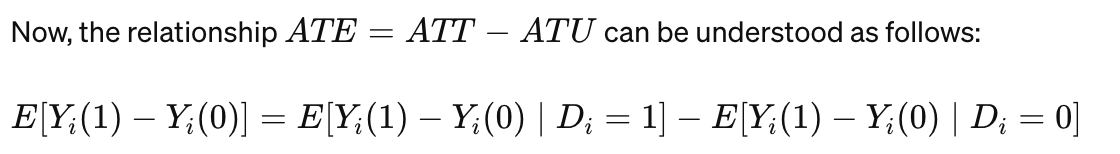

In other words, the overall average treatment effect for the entire population is equal to the average treatment effect for the treated individuals (ATT) minus the average treatment effect for the untreated individuals (ATU). This equation highlights how the treatment effect within the treated group and the untreated group contributes to the overall treatment effect in the population.

**Simple Difference in outcomes** calculates the difference in average outcomes between a treatment group and a control group. The formula for the Simple Difference in Outcomes is given by:

SDO = $\bar{y}treatment$ - $\bar{y}control$

where, 

$\bar{y}treatment$ is Average outcome in Treatment Group

$\bar{y}control$ is Average outcome in Control Group

**Surgery example**

So we know that the overall effect of surgery is positive, although the effect for some is negative. There exist heterogeneous treatment effects, in other words, but the net effect is positive. What if we were to simply compare the average post-surgery life span for the two groups? This simplistic estimator is called the simple difference in means, and it is an estimate of the ATE equal to:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>E</mi>
  <mrow data-mjx-texclass="ORD">
    <mo minsize="1.2em" maxsize="1.2em">[</mo>
  </mrow>
  <msup>
    <mi>Y</mi>
    <mn>1</mn>
  </msup>
  <mo>&#x2223;</mo>
  <mi>D</mi>
  <mo>=</mo>
  <mn>1</mn>
  <mrow data-mjx-texclass="ORD">
    <mo minsize="1.2em" maxsize="1.2em">]</mo>
  </mrow>
  <mo>&#x2212;</mo>
  <mi>E</mi>
  <mrow data-mjx-texclass="ORD">
    <mo minsize="1.2em" maxsize="1.2em">[</mo>
  </mrow>
  <msup>
    <mi>Y</mi>
    <mn>0</mn>
  </msup>
  <mo>&#x2223;</mo>
  <mi>D</mi>
  <mo>=</mo>
  <mn>0</mn>
  <mrow data-mjx-texclass="ORD">
    <mo minsize="1.2em" maxsize="1.2em">]</mo>
  </mrow>
</math>
 
which in this situation is equal to `7-7.4 = -0.4`. That means that the treatment group lives `0.4` fewer years post-surgery than the chemo group when the perfect doctor assigned each unit to its best treatment. While the statistic is true, notice how misleading it is. This statistic without proper qualification could easily be used to claim that, on average, surgery is harmful, when we know that’s not true. **It’s biased because the individuals units were optimally sorting into their best treatment option, creating fundamental differences between treatment and control group that are a direct function of the potential outcomes themselves.** To make this as clear as I can make it, we will decompose the simple difference in means into three parts. Those three parts are listed below:

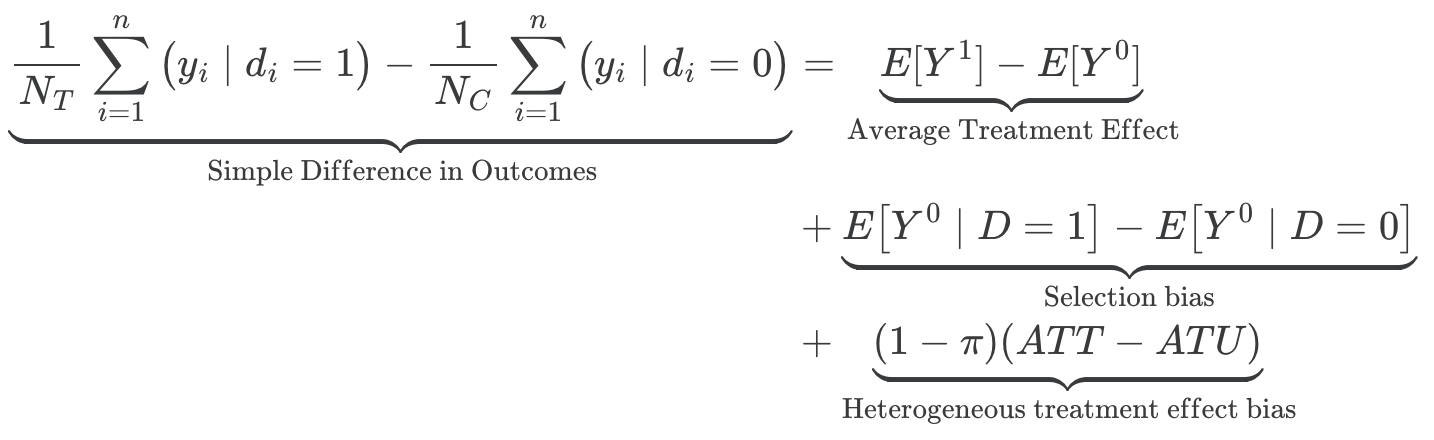

What I find interesting—hopeful even—in this decomposition is that it shows that a contrast between treatment and control group technically “contains” the parameter of interest. I placed “contains” in quotes because while it is clearly visible in the decomposition, the simple difference in outcomes is ultimately not laid out as the sum of three parts. Rather, the simple difference in outcomes is nothing more than a number. The number is the sum of the three parts, but we cannot calculate each individual part because we do not have data on the underlying counterfactual outcomes needed to make the calculations. The problem is that that parameter of interest has been masked by two forms of bias, the selection bias and the heterogeneous treatment effect bias. If we knew those, we could just subtract them out, but ordinarily we don’t know them. We develop strategies to negate these biases, but we cannot directly calculate them any more than we can directly calculate the ATE, as these biases depend on unobservable counterfactuals.

The problem isn’t caused by assuming heterogeneity either. We can make the strong assumption that treatment effects are constant, which will cause `ATU = ATT` and make `SDO = ATE + selection bias`. But we’d still have that nasty selection bias screwing things up. **One could argue that the entire enterprise of causal inference is about developing a reasonable strategy for negating the role that selection bias is playing in estimated causal effects.**

#### Independence assumption

The independence assumption states that the potential outcomes for an individual under different treatment conditions are independent of the treatment assignment. In other words, the treatment assignment is assumed to be unrelated to the potential outcomes, conditional on observed covariates.

What this means is that surgery was assigned to an individual for reasons that had nothing to do with the gains to surgery. Now in our example, we already know this is violated because the perfect doctor specifically chose surgery or chemo based on expected potential outcomes. Specifically, a patient received surgery if Y<sup>1</sup> > Y<sup>0</sup> and chemo if Y<sup>1</sup> < Y<sup>0</sup>. Thus, in our case, the perfect doctor ensured `D` depended on Y<sup>1</sup> and Y<sup>0</sup>. 

If treatment is assigned randomly and independent of potential outcomes, it implies that the average potential outcome is balanced between the treatment and control groups. Randomization, in this context, would eliminate both **selection bias** and **bias due to heterogeneous treatment effects**. Selection bias is eliminated because treatment assignment is no longer based on potential outcomes. Heterogeneous treatment bias is also eliminated because, if treatment is independent of potential outcomes, the biases in the average treatment effect (ATT) and average treatment effect on the untreated (ATU) are reduced.

**Example Outcome:**

Let's say, after the study, the researchers find that the treated group (those who received the drug) had an average improvement in health of 8 units, and the untreated group (those who did not receive the drug) had an average improvement of 2 units.

**Before Randomization (Potential Bias):**

Without randomization, if patients with more severe conditions were more likely to receive the drug, the observed difference in outcomes might be influenced by the initial health status of the patients.

**After Randomization (Reduced Bias):**

With randomization, the observed difference in outcomes is less likely to be confounded by the initial health status because, on average, potential outcomes are balanced between the treatment and control groups.

In this example, the independence of treatment assignment and potential outcomes through randomization contributes to a more reliable estimation of the treatment effect, reducing biases associated with heterogeneous treatment effects.

Let's run a monte carlo simulation to illustrate the example. Note that `ATE`, in this example is equal to 0.6.

In [47]:
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)

def gap():
    sdo = pd.DataFrame({
        'y1': (7, 5, 5, 7, 4, 10, 1, 5, 3, 9),
        'y0' : (1, 6, 1, 8, 2, 1, 10, 6, 7, 8),
        'random' : np.random.normal(size=10)})
    sdo.sort_values('random', inplace=True)
    sdo['d'] = [1,1,1,1,1,0,0,0,0,0]
    sdo['y'] = sdo['d']*sdo['y1'] + (1-sdo['d'])*sdo['y0']

    sdo = np.mean(sdo.y.values[0:5] - sdo.y.values[5:10])

    return sdo


sim = [gap() for x in range(1000)]
np.mean(sim)

0.5948

This Monte Carlo runs **10,000 times**, each time calculating the average SDO under independence—which is ensured by the random number sorting that occurs. In my running of this program, the ATE is **0.6**, and the SDO is on average equal to **0.616400**.

Independence suggests that, on average in a large population, the two groups of units (e.g., surgery and chemotherapy) have the same potential outcome. In the example, this means that, on average, the potential outcomes for those who receive surgery are equal to the potential outcomes for those who receive chemotherapy in the entire population. 

#### SUTVA 

SUTVA, which stands for **Stable Unit Treatment Value Assumption**, is a key assumption in causal inference that underlies the potential outcomes framework. The assumption plays a crucial role in ensuring the validity of causal effect estimates.

Here are the key components of the SUTVA assumptions:

**Stable unit Treatment Value:** Each unit in the study receives the same treatment level (or "dose"). This means that if two units receive the same treatment level, their potential outcomes would be the same, and the treatment effect is homogeneous across units. It’s easy to imagine violations of this, though—for instance, if some doctors are better surgeons than others. In which case, we just need to be careful what we are and are not defining as the treatment.

**No Spillover Effects:** There are no spillover effects or externalities. The potential outcome of a unit is not influenced by the treatment levels assigned to other units. The treatment assigned to one unit does not affect the potential outcomes of other units.

**No General Equilibrium Effects:** Changes in the treatment assignment and potential outcomes for one unit do not have broader general equilibrium effects on the overall system. (No Network effects in marketplaces / social networks) The assumption is that the study operates in isolation without systemic impacts.

#### Randomization-based inference

Athey and Imbens (2017) highlight a shift in the approach to statistical inference, particularly in the context of randomized experiments. Traditionally, statistical inference relied on assuming a specific population distribution and deriving uncertainty measures based on hypothetical random sampling from that distribution. However, in the case of randomized experiments, the random assignment of treatments itself introduces a source of uncertainty. 

Traditional methods relying on standard errors may not be as meaningful in certain contexts, especially when dealing with causal studies rather than traditional samples. The core uncertainty in causal studies stems from the lack of knowledge about counterfactuals rather than typical sampling uncertainty.

Key points from the statement:

1. **Randomization-Based Inference:** In the context of randomized experiments, uncertainty in estimates is attributed to the random assignment of treatments rather than assumptions about the distribution of a larger population. This approach recognizes that randomization is a deliberate method to ensure balance across treatment groups, and any observed differences can be attributed to the treatment effect.

2. **Exact p-Values:** Athey and Imbens advocate for the use of randomization-based methods to construct exact p-values. Traditional p-values are often based on assumptions about the underlying population distribution, which may not be fully met in practice. Randomization-based methods provide a more direct way to assess the probability of observing the estimated effect purely by chance.

3. **Likelihood of Chance Producing the Estimate:** The use of exact p-values in this context reflects the likelihood that the observed estimate could have occurred due to random chance alone. This aligns with the idea that, in a well-designed randomized experiment, any observed differences between treatment groups are more likely to be attributed to the treatment effect rather than sampling variability.

Overall, this approach emphasizes the importance of leveraging the design of randomized experiments to directly quantify uncertainty and assess the statistical significance of estimated effects without relying on strong parametric assumptions about population distributions.

Randomization inference is a statistical method that is often used to draw inferences about the effects of a treatment or intervention in an experiment. Fisher's sharp null hypothesis is a specific form of null hypothesis proposed by Sir Ronald A. Fisher, a pioneering statistician. In the context of randomization inference, Fisher's sharp null hypothesis asserts that the treatment has no effect on the outcome variable for any individual unit in the population.

Here's a step-by-step explanation of the randomization inference method based on Fisher's sharp null:

1. **Random Assignment:** In a randomized experiment, subjects or units are randomly assigned to either the treatment or control group. This random assignment helps ensure that, on average, the treatment and control groups are similar at the outset, and any differences observed after the intervention can be attributed to the treatment.

2. **Observed Test Statistic:** A test statistic is chosen to measure the difference between the treatment and control groups on the outcome variable. This could be a mean difference, a t-statistic, or another appropriate measure depending on the nature of the data.

3. **Randomization Distribution:** Under Fisher's sharp null hypothesis, the treatment assignment is considered as if it were completely random and independent of the potential outcomes. The randomization distribution is generated by repeatedly shuffling the treatment assignments among the units, creating a distribution of the test statistic under the assumption that the treatment has no effect.

4. **Comparison to Observed Test Statistic:** The observed test statistic from the actual experiment is then compared to the distribution of test statistics generated under the null hypothesis. If the observed test statistic is extreme relative to the randomization distribution, it suggests that the sharp null hypothesis is unlikely, and one may reject the null hypothesis in favor of the alternative that there is a treatment effect.

5. **P-Value Calculation:** The p-value is the probability of observing a test statistic as extreme as, or more extreme than, the one observed, assuming the null hypothesis is true. A small p-value indicates evidence against the null hypothesis.

6. **Inference:** If the p-value is below a pre-specified significance level (e.g., 0.05), one may reject the sharp null hypothesis and conclude that there is evidence of a treatment effect.

Randomization inference based on Fisher's sharp null hypothesis provides a rigorous way to assess the statistical significance of treatment effects in randomized experiments. It relies on the idea that random assignment ensures that, on average, the treatment and control groups are comparable at the outset, allowing for a causal interpretation of any differences observed post-treatment.

Relevant readings:

https://arxiv.org/abs/1506.02084 

https://www.theigc.org/sites/default/files/2016/06/athey_imbens_june19.pdf

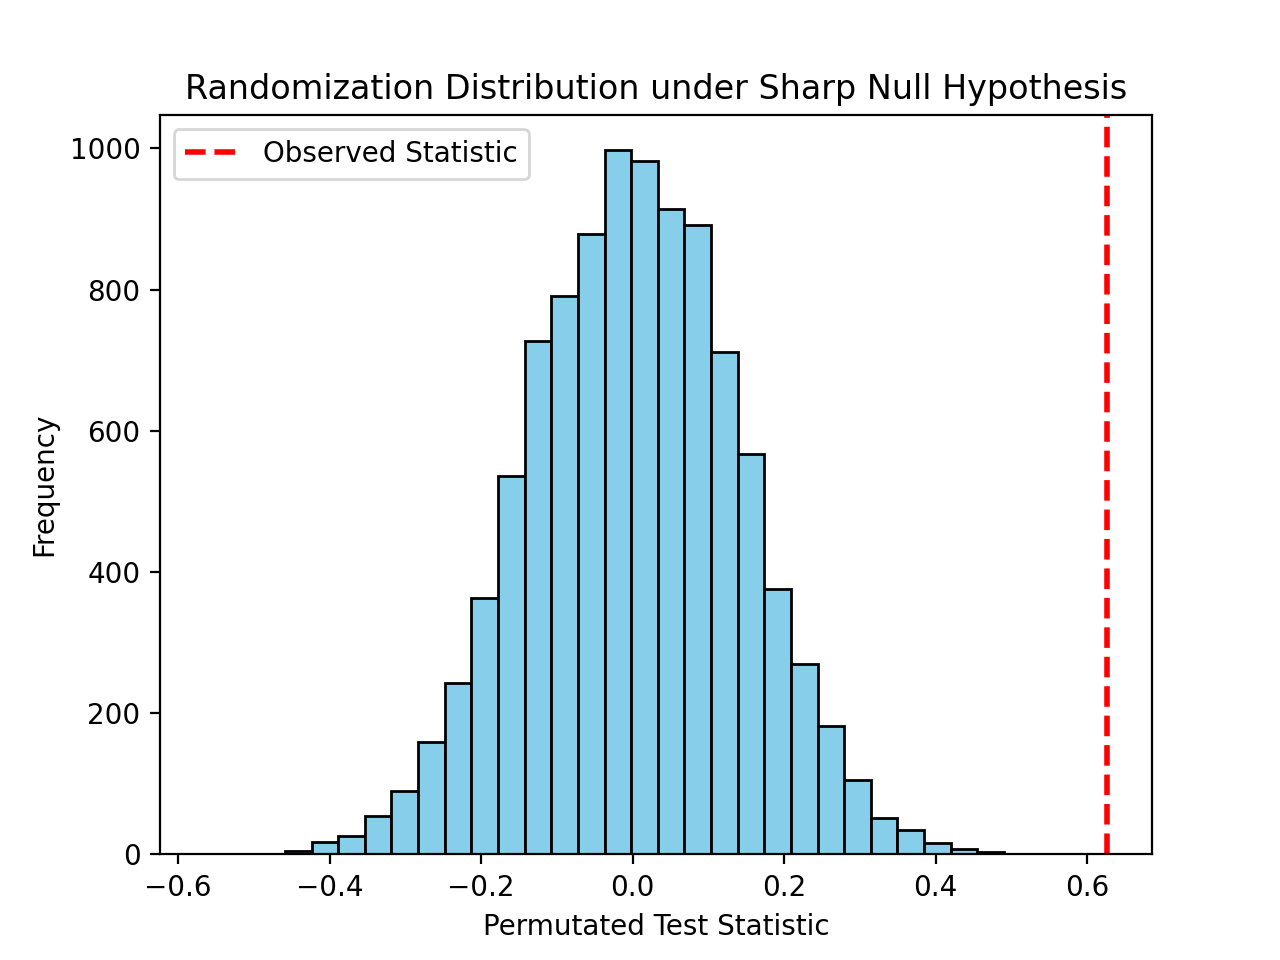

Observed Statistic: 0.6261511044440178
P-value: 0.0


In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Number of individuals in the experiment
n_individuals = 100

# Generate random outcome data for the control group (e.g., pre-treatment measurements)
control_outcomes = np.random.normal(loc=0, scale=1, size=n_individuals)

# Generate random outcome data for the treatment group (e.g., potential outcomes under treatment)
treatment_outcomes = np.random.normal(loc=0.5, scale=1, size=n_individuals)

# Observed test statistic (e.g., mean difference)
observed_statistic = np.mean(treatment_outcomes) - np.mean(control_outcomes)

# Number of random permutations to create the randomization distribution
n_permutations = 10000

# Initialize an array to store permuted test statistics
permuted_statistics = np.zeros(n_permutations)

# Randomization inference loop
for i in range(n_permutations):
    # Randomly shuffle treatment assignments
    shuffled_outcomes = np.random.permutation(np.concatenate([control_outcomes, treatment_outcomes]))
    
    # Calculate the permuted test statistic
    permuted_statistic = np.mean(shuffled_outcomes[:n_individuals]) - np.mean(shuffled_outcomes[n_individuals:])

    # Store the permuted test statistic
    permuted_statistics[i] = permuted_statistic

# Calculate the p-value
p_value = np.mean(np.abs(permuted_statistics) >= np.abs(observed_statistic))

# Plot the randomization distribution
plt.hist(permuted_statistics, bins=30, color='skyblue', edgecolor='black')
plt.axvline(observed_statistic, color='red', linestyle='dashed', linewidth=2, label='Observed Statistic')
plt.title('Randomization Distribution under Sharp Null Hypothesis')
plt.xlabel('Permutated Test Statistic')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Display the p-value
print(f'Observed Statistic: {observed_statistic}')
print(f'P-value: {p_value}')

### Matching and Subclassification

**Subclassification**

Example: Impact of a New Teaching Method on Test Scores

Consider a study investigating the impact of a new teaching method on students' test scores. The potential confounder in this case is the students' prior academic performance. Students with higher prior academic performance might perform better on tests regardless of the teaching method.

Variables:

Treatment variable (T): New teaching method (1 = treatment, 0 = control).
Outcome variable (Y): Test scores.
Confounder (C): Prior academic performance (e.g., high, medium, low).
Steps in Subclassification:

Stratification: Stratify the study population based on the confounder (prior academic performance). Create strata for high, medium, and low prior academic performance.

Comparison within Strata:

For each stratum, compare the mean test scores of the treatment group and the control group separately.
Calculate the mean difference within each stratum.

Weighting:

Assign weights to the mean differences within each stratum based on the size of the stratum.
Larger strata may have more influence on the overall estimate.

Calculate Overall Average Treatment Effect:

Combine the stratum-specific weighted mean differences to obtain an overall average treatment effect.

In [44]:
# Generate synthetic data
np.random.seed(42)
data = pd.DataFrame({
    'T': np.random.choice([0, 1], size=100),
    'Y': np.random.normal(loc=0, scale=1, size=100),
    'C': np.random.choice(['low', 'medium', 'high'], size=100)
})

# Subclassification
strata = data.groupby('C')
effect_estimates = []

for name, group in strata:
    model = sm.OLS(group['Y'], sm.add_constant(group['T'])).fit()
    effect_estimates.append({'Stratum': name, 'Effect Estimate': model.params['T']})

# Weighted average treatment effect
weighted_average_effect = np.average([est['Effect Estimate'] for est in effect_estimates],
                                     weights=[len(group) for name, group in strata])

print("Stratum-Specific Effect Estimates:")
print(pd.DataFrame(effect_estimates))
print("\nWeighted Average Treatment Effect:", weighted_average_effect)

Stratum-Specific Effect Estimates:
  Stratum  Effect Estimate
0    high         0.116944
1     low        -0.295839
2  medium        -0.309318

Weighted Average Treatment Effect: -0.18044535666607497


In this example, the data is stratified based on the confounder 'C' (prior academic performance). The effect of the treatment is estimated within each stratum, and a weighted average treatment effect is calculated, giving more weight to larger strata. The result provides a more nuanced understanding of how the treatment affects test scores within different strata of prior academic performance, addressing potential confounding by this observed variable.

For instance, in Krueger (1999), Tennessee randomly assigned kindergarten students and their teachers to small classrooms, large classrooms, and large classrooms with an aide. But the state did this conditionally—specifically, schools were chosen, and then students were randomized. Krueger therefore estimated regression models that **included a school fixed effect** because he knew that the treatment assignment was only conditionally random.

There two key assumptions that are crucial when estimating a causal effect in the presence of a confounder. Let's break down these assumptions:

1. **Conditional Independence Assumption (CIA):**
   - **Definition:** CIA assumes that, within each stratum defined by the observed confounders, the treatment assignment is conditionally independent of the potential outcomes. In other words, once we condition on the confounders, the treatment assignment is assumed to be independent of the potential outcomes for the given stratum.
   - **Implication:** CIA is essential for ensuring that, within each stratum, the treatment and control groups are comparable in terms of observed confounders, allowing for a valid estimation of causal effects.

2. **Probability of Treatment Between 0 and 1 for Each Stratum:**
   - **Definition:** This assumption specifies that the probability of receiving the treatment (or control) within each stratum of the observed confounders must be between 0 and 1. In other words, for each subgroup defined by the confounders, there should be variation in treatment assignment.
   - **Implication:** This assumption is necessary to ensure that all potential subgroups within the strata have a chance of receiving both the treatment and the control. It allows for meaningful comparisons and avoids situations where certain subgroups have no variation in treatment assignment.

These assumptions collectively provide a foundation for causal inference when dealing with confounding variables. They are critical for the proper application of methods such as subclassification or stratification, as discussed in the earlier example. Violations of these assumptions may lead to biased estimates and incorrect inferences regarding causal effects.

In summary, when estimating causal effects in the presence of a confounder, it is essential to assume conditional independence within strata (CIA) and ensure that the probability of treatment assignment varies between 0 and 1 for each stratum defined by observed confounders. These assumptions help address confounding and support valid causal inference.

**Matching** is a method used in observational studies to create comparable groups for treatment and control units by pairing them based on similar observed characteristics. One approach is to use the normalized Euclidean distance as a measure of similarity between units. Let's go through an example to illustrate matching using normalized Euclidean distance.

Example: Evaluating the Impact of a Training Program on Job Performance

Suppose you are conducting a study to assess the impact of a training program on job performance. You have data on individuals who participated in the training (treatment group) and those who did not (control group). Relevant covariates include years of experience, education level, and initial job performance scores.

Here's a step-by-step explanation of matching using normalized Euclidean distance:

1. Data Preparation:

Collect data on treatment and control groups, including covariates.
Standardize or normalize the covariates to ensure that they are on a comparable scale.

2. Calculate Normalized Euclidean Distance:

The formula for the normalized Euclidean distance (D<sub>normalized</sub>) between two points `P = (p1, p2,...,pn) and Q = (q1, q2,...,qn)` in an `n`-dimensional space is:

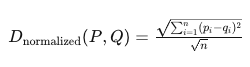

For each unit in the treatment group, calculate the normalized Euclidean distance to all units in the control group based on the standardized covariates.

3. Pairing Units:

Pair each unit in the treatment group with the unit in the control group that has the smallest normalized Euclidean distance.
This forms pairs of treated and control units that are most similar in terms of observed covariates.
Assessing Balance:

Check the balance / distribution of covariates between the treated and control groups after matching.
Evaluate the standardized mean differences to ensure that covariates are well-balanced between the two groups.

4. Estimating Treatment Effect:

Compare the outcomes (job performance) between the matched treatment and control groups to estimate the causal effect of the training program.

**Propensity score matching**


Propensity score matching is a method used in observational studies for causal inference. It involves estimating the probability (propensity score) of receiving a treatment given observed covariates and then matching treated and untreated units based on their propensity scores. The goal is to create balanced groups, making the treated and control groups comparable with respect to observed covariates, thus reducing the impact of confounding variables.

Here are the key steps in propensity score matching for causal inference:

Define Treatment and Outcome:

Identify the treatment (e.g., receiving a medical intervention, participating in a program) and the outcome of interest.
Collect Covariates:

Collect information on potential confounding variables (covariates) that may influence both the treatment assignment and the outcome.
Estimate Propensity Scores:

Use statistical methods, such as logistic regression, to estimate the probability of receiving the treatment (propensity score) based on the observed covariates.
Choose Matching Method:

Select a matching method to pair treated and control units based on their propensity scores. Common methods include nearest neighbor matching, kernel matching, and exact matching.
Balance Covariates:

Evaluate whether the propensity score matching successfully balances covariates between the treated and control groups. This is crucial for creating comparable groups.
Assess Balance:

Examine standardized mean differences or other metrics to assess the balance achieved in covariates after matching. A balanced distribution indicates successful matching.
Estimate Treatment Effect:

Compare the outcome of interest between the matched treated and control groups to estimate the causal effect of the treatment.
Sensitivity Analysis:

Conduct sensitivity analyses to assess the robustness of the estimated treatment effect to different matching specifications or model assumptions.
Example:

Suppose you are studying the impact of a job training program on employment status. You collect data on individuals' characteristics (e.g., education level, prior work experience) and whether they participated in the training program. By estimating the propensity scores, you can match individuals who participated in the training with those who did not, but have similar propensity scores. This matching process helps control for observed confounding variables, allowing for a more accurate estimation of the causal effect of the training program on employment status.

Propensity score matching is just one of the many methods used in causal inference. It's particularly useful when dealing with observational data, where random assignment to treatment and control groups is not feasible. Matching based on propensity scores helps mimic a randomized controlled trial by creating comparable groups, thereby reducing bias and improving the validity of causal inferences in observational studies.

**Difference-in-Differences**


`DiD = (Y1 Post - Y1 Pre) - (Y0 Post - Y0 Pre) i.e (TreatmentGroupPost - TreatmentGroupPre) - (ControlGroupPost - ControlGroupPre)` 


When thinking about situations in which a difference-in-differences design can be used, one usually tries to find an instance where a consequential treatment was given to some people or units but denied to others “haphazardly.” This is sometimes called a “natural experiment” because it is based on naturally occurring variation in some treatment variable that affects only some units over time. All good difference-in-differences designs are based on some kind of natural experiment. 



Can't we identify the causal effect of some treatment `D` if we just compare the post-treatment values to that of the control values? This is in many ways an obvious choice, and in fact, it is one of the more common naive approaches to causal inference. After all, we have a control group, don’t we? Why can’t we just compare a treatment group to a control group? 

One of the things we immediately must remember is that the simple difference in outcomes, which is all we are doing here, only collapsed to the ATE **if the treatment had been randomized**. But it is never randomized in the real world where most choices if not all choices made by real people is endogenous to potential outcomes.

**Key Assumptions:**

1. _Parallel Trends Assumption:_

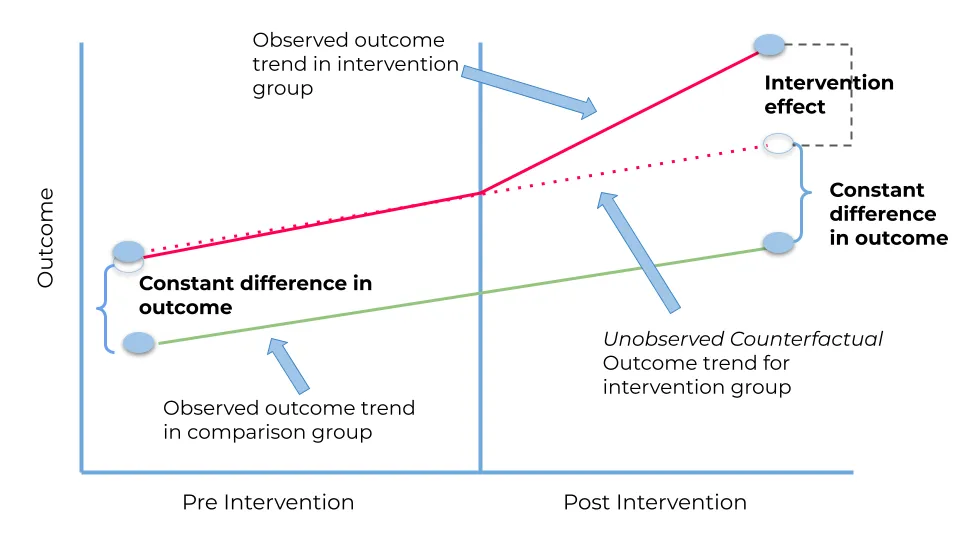


Assumption: **In the absence of treatment, the treated and control groups would have followed parallel trends over time. i.e the treatment group would have developed in the same way as the control group, had the treatment group not received the treatment.** 

Rationale: The main idea is that any differences in the trends between the treated and control groups before the treatment began are due to unobserved factors that are constant over time. The treatment effect is then identified by comparing the changes in outcomes after the treatment.

In the NJ vs PA minimum wage hike study, we are interested in the average causal effect of the minimum-wage hike on employment, or the ATT. Using our decomposition of the `2x2` DD from earlier, we can write it out as:

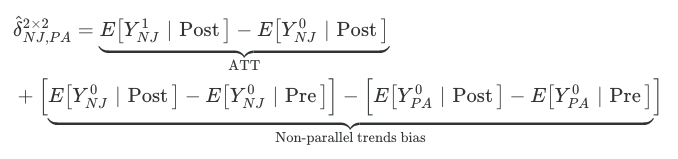

we see the key assumption: the parallel-trends assumption, which is represented by the first difference in the second line. Insofar as parallel trends holds in this situation, then the second term goes to zero, and the `2x2` DD collapses to the ATT.

The `2x2` DD requires differencing employment in NJ and PA, then differencing those first differences. This set of steps estimates the true ATT so long as the parallel-trends bias is zero.

2. _Common Trends Assumption:_

Assumption: Both the treated and control groups would have experienced the same average treatment effect if they had received the treatment.

Rationale: This assumption ensures that the treatment and control groups share similar characteristics in terms of factors that could affect the outcome variable.

3. _Treatment and Control Group Homogeneity:_

Assumption: There are no systematic differences in observable or unobservable characteristics between the treated and control groups that could affect outcomes over time.

Rationale: This assumption ensures that any differences observed in the treatment and control groups are attributable to the treatment itself and not to pre-existing differences between the groups.

4. _Time-Invariance of Treatment:_

Assumption: The treatment is constant over time and does not vary within the treatment group during the observation period.

Rationale: This assumption is important for maintaining the integrity of the DiD design. If the treatment intensity changes over time, it can complicate the interpretation of the estimated treatment effect.

**Q: When to use Causal Inference methods like Difference-in-Differences over say, A/B tests?**

**When randomization is not feasible or ethical**, as is often the case in observational studies, causal inference methods like difference-in-differences become valuable. DiD helps control for potential confounding variables.
Long-Term Effects and Trends:

If you're **interested in understanding the long-term effects of an intervention or tracking changes over time**, DiD may be more appropriate. It accounts for underlying trends in both treatment and control groups.

**Addressing Selection Bias:**

DiD helps mitigate selection bias by comparing changes in outcomes over time between the treated and control groups. This is particularly useful when treatment assignment is not random, and there may be systematic differences between the groups.

**Natural Experiments or Policy Changes:**

Difference-in-differences is effective when you can leverage a natural experiment or policy change that differentially affects treatment and control groups. It allows you to estimate the causal effect of the treatment in the presence of this exogenous shock.

While differences in sample averages will identify the **ATT under the parallel assumption**, we may want to use **multivariate regression** instead. For instance, if you need to **avoid omitted variable bias through controlling for endogenous covariates that vary over time**, then you may want to use regression. Such strategies are another way of saying that you will need to close some known critical backdoor. Another reason for the equation is that by controlling for more appropriate covariates, you can reduce residual variance and improve the precision of your DD estimate.

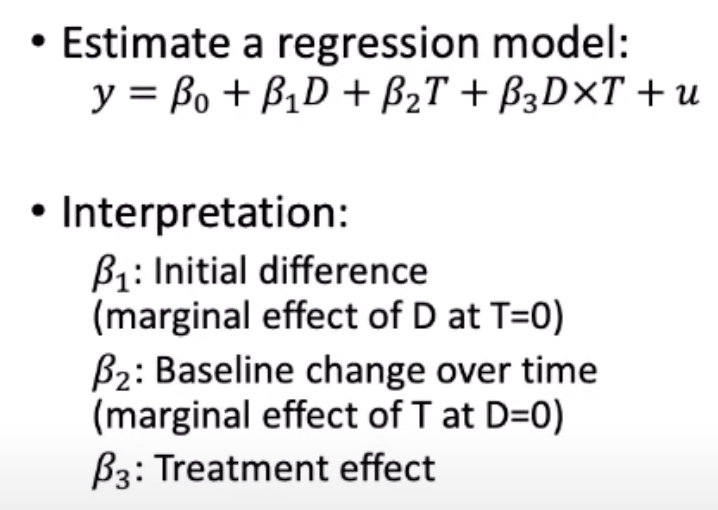

Using the switching equation, and assuming a constant **state fixed effect** and **time fixed effect**, we can write out a simple regression model estimating the causal effect of the minimum wage on employment, `Y`. 


\begin{equation}
Y_{its} = \alpha + \gamma NJ_s + \lambda D_t + \delta (NJ \times D)_{st} + \varepsilon_{its}\
\end{equation}

**Testing the parallel trends assumption**

Using the pre-treatment data, we can examine whether the trends between the treatment and control groups were similar before the treatment was implemented. This method is particularly useful when there are limited pre-treatment periods.

In this approach, the regression model includes an interaction between the treatment variable and a pre-treatment period dummy variable. If the coefficient on this interaction term is statistically significant, it suggests that the trends were not parallel before the treatment, casting doubt on the validity of the DID estimates.

Let's consider a study investigating the impact of a job training program (the treatment) on income levels. The treatment group consists of individuals who participated in the job training program, and the control group consists of individuals who did not receive the training.

Define the DiD Model for Pre-Treatment Data:



\begin{equation}
Income_it = α + β⋅Treatment_i + γ⋅Pre_t + δ⋅(Treatment_i ×Pre_t) + ε_it
​\end{equation}
 


`Income it:` Income for individual i at time t.

`Treatment i:` Binary variable (1 for treatment, 0 for control).

`Pre t:` Binary variable (1 for pre-treatment, 0 for post-treatment).

`δ:` DiD coefficient representing the difference in pre-treatment trends.